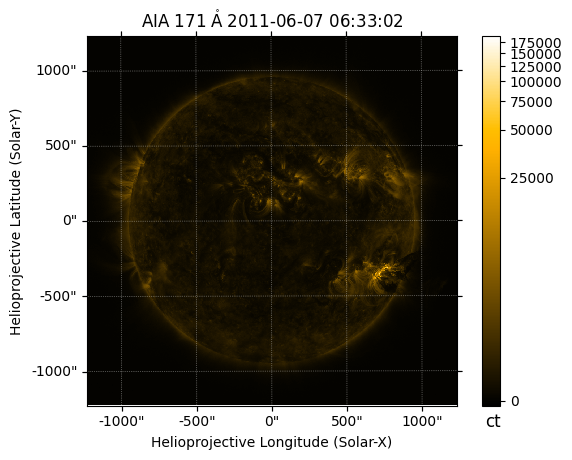

In [111]:
#https://docs.sunpy.org/en/stable/guide/tour.html

import sunpy.data.sample
import sunpy.map

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia.peek()

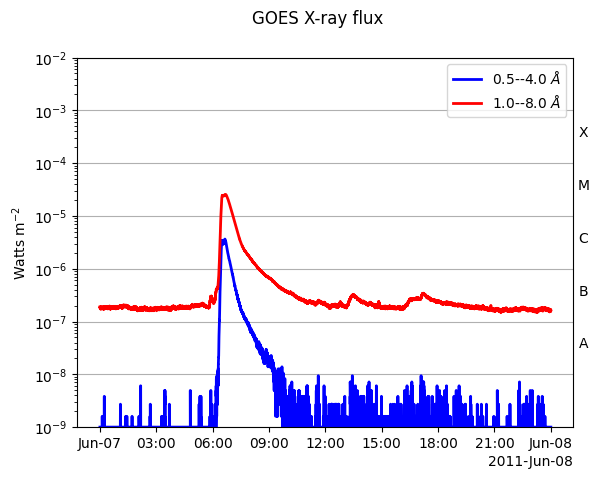

In [112]:
import numpy as np
import sunpy.data.sample
import sunpy.timeseries as ts

my_timeseries = ts.TimeSeries(sunpy.data.sample.GOES_XRS_TIMESERIES, source='XRS')
my_timeseries.peek()

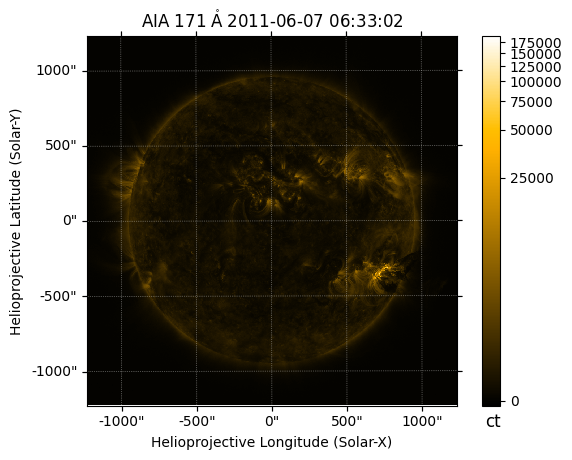

In [113]:
import sunpy.map
import sunpy.data.sample

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia.peek()

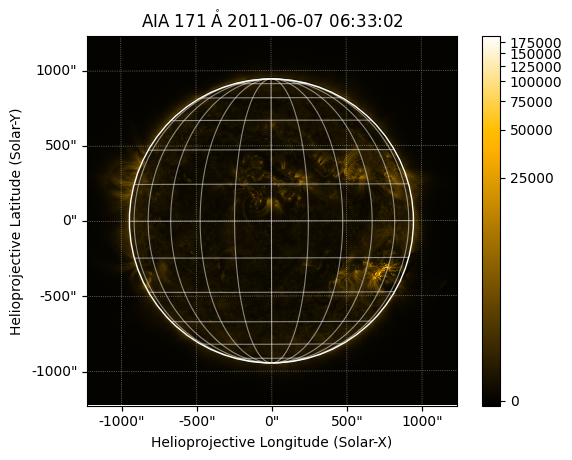

In [114]:
import sunpy.map
import matplotlib.pyplot as plt
import sunpy.data.sample

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

fig = plt.figure()
ax = plt.subplot(111, projection=aia)

aia.plot()
aia.draw_limb()
aia.draw_grid()
plt.colorbar()

plt.show()

In [115]:
from sunpy.sun import constants as con
# one astronomical unit (the average distance between the Sun and Earth)
print(con.au)

  Name   = Astronomical Unit
  Value  = 149597870700.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2012 Resolution B2


In [116]:
# the solar radius
print(con.radius)

  Name   = Nominal solar radius
  Value  = 695700000.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2015 Resolution B 3


In [117]:
solar_constants = con.constants
solar_constants.keys()

dict_keys(['mass', 'radius', 'luminosity', 'mean distance', 'perihelion distance', 'aphelion distance', 'age', 'solar flux unit', 'visual magnitude', 'average angular size', 'surface area', 'average density', 'surface gravity', 'moment of inertia', 'volume', 'escape velocity', 'oblateness', 'metallicity', 'sunspot cycle', 'average intensity', 'effective temperature', 'mass conversion rate', 'center density', 'center temperature', 'absolute magnitude', 'mean energy production', 'ellipticity', 'GM', 'W_0', 'sidereal rotation rate', 'first Carrington rotation (JD TT)', 'mean synodic period', 'alpha_0', 'delta_0'])

In [118]:
sunpy.sun.constants.print_all()

key,name,value,uncertainty,unit,Reference
str33,str54,float64,float64,str11,str60
mass,Solar mass,1.9884754153381438e+30,9.236140093538353e+25,kg,IAU 2015 Resolution B 3 + CODATA 2014
radius,Nominal solar radius,695700000.0,0.0,m,IAU 2015 Resolution B 3
luminosity,Nominal solar luminosity,3.828e+26,0.0,W,IAU 2015 Resolution B 3
mean distance,Astronomical Unit,149597870700.0,0.0,m,IAU 2012 Resolution B2
perihelion distance,Perihelion Distance,147100000000.0,0.0,m,Allen's Astrophysical Quantities 4th Ed.
aphelion distance,Aphelion Distance,152100000000.0,0.0,m,Allen's Astrophysical Quantities 4th Ed.
age,Age of the Sun,4600000000.0,100000000.0,yr,Allen's Astrophysical Quantities 4th Ed.
solar flux unit,Solar flux unit,1e-22,0.0,W / (Hz m2),Allen's Astrophysical Quantities 4th Ed.
visual magnitude,Apparent visual magnitude,-26.75,0.0,,Allen's Astrophysical Quantities 4th Ed.


In [119]:
from sunpy.sun import constants as con
con.radius

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar radius' value=695700000.0 uncertainty=0.0 unit='m' reference='IAU 2015 Resolution B 3'>

In [120]:
con.radius.to('km')

<Quantity 695700. km>

In [121]:
import astropy.units as u
con.radius.to(u.km)

<Quantity 695700. km>

In [122]:
r = con.radius.to(u.km)
r.value
# 695700.0
r.unit
# Unit("km")

Unit("km")

In [123]:
import numpy as np
import astropy.units as u

def circle_area(radius):
    return np.pi * radius ** 2

In [124]:
circle_area(4 * u.m)

<Quantity 50.26548246 m2>

In [125]:
from astropy.units import imperial
circle_area(4 * imperial.foot)

<Quantity 50.26548246 ft2>

In [126]:
circle_area((4 * u.m).to(imperial.foot))

<Quantity 541.05315022 ft2>

In [127]:
circle_area(4 * u.m).to(imperial.foot ** 2)

<Quantity 541.05315022 ft2>

In [128]:
import sunpy.time

# parsing a standard time strings
sunpy.time.parse_time('2004/02/05 12:00')

<Time object: scale='utc' format='isot' value=2004-02-05T12:00:00.000>

In [129]:
# This returns a astropy.time.Time object. All sunpy functions which require
# time as an input sanitize the input using parse_time.

# the julian day
sunpy.time.parse_time((2010,4,30)).jd

2455316.5

In [130]:
# TimeRange objects are useful for representing ranges of time
time_range = sunpy.time.TimeRange('2010/03/04 00:10', '2010/03/04 00:20')
time_range.center

<Time object: scale='utc' format='isot' value=2010-03-04T00:15:00.000>

In [131]:
from sunpy.net import Fido, attrs as a

results = Fido.search(a.Time("2011-09-20T01:00:00", "2011-09-20T02:00:00"),
                      a.Instrument.eit)
Fido.fetch(results, path="./directory/")

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

efz20110920.010613:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

efz20110920.011353:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

efz20110920.010015:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

efz20110920.011947:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

['directory/efz20110920.010015', 'directory/efz20110920.010613', 'directory/efz20110920.011353', 'directory/efz20110920.011947']

In [132]:
import astropy.units as u
from sunpy.net import Fido, attrs as a
from sunpy.database import Database

db = Database()
db.fetch(a.Time("2011-09-20T01:00:00", "2011-09-20T02:00:00"),
         a.Instrument.aia, a.Sample(45*u.min))
db.commit()
db

Files Downloaded: 0file [00:00, ?file/s]

id,observation_time_start,observation_time_end,instrument,source,provider,physobs,wavemin,wavemax,path,fileid,tags,starred,download_time,size
str1,str19,str19,str3,str3,str4,str9,str4,str4,str78,str24,str3,str2,str19,str7
1,2011-09-20 01:00:00,2011-09-20 01:00:01,AIA,SDO,JSOC,intensity,17.1,17.1,/home/gurbaaz/sunpy/data/aia_lev1_171a_2011_09_20t01_00_00_34z_image_lev1.fits,aia__lev1:171:1095555635,N/A,No,2023-04-26 10:16:10,66200.0
2,2011-09-20 01:00:00,2011-09-20 01:00:01,AIA,SDO,JSOC,intensity,17.1,17.1,/home/gurbaaz/sunpy/data/aia_lev1_171a_2011_09_20t01_00_00_34z_image_lev1.fits,aia__lev1:171:1095555635,N/A,No,2023-04-26 10:16:10,66200.0
3,2011-09-20 01:45:00,2011-09-20 01:45:01,AIA,SDO,JSOC,intensity,17.1,17.1,/home/gurbaaz/sunpy/data/aia_lev1_171a_2011_09_20t01_45_00_34z_image_lev1.fits,aia__lev1:171:1095558335,N/A,No,2023-04-26 10:16:10,66200.0
4,2011-09-20 01:45:00,2011-09-20 01:45:01,AIA,SDO,JSOC,intensity,17.1,17.1,/home/gurbaaz/sunpy/data/aia_lev1_171a_2011_09_20t01_45_00_34z_image_lev1.fits,aia__lev1:171:1095558335,N/A,No,2023-04-26 10:16:10,66200.0


In [133]:
entries = db.search(a.Time("2011-09-20T01:45:00", "2011-09-20T02:15:00"), a.Instrument.aia)
len(entries)

2